In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import os
import pandas as pd

In [3]:
def plot_color_distribution(flags_dir, num_colors=5):
    color_data = []
    
    for flag_file in os.listdir(flags_dir)[:150]:  # Process first 150 flags
        img = cv2.imread(os.path.join(flags_dir, flag_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (100, 70))  # Standardize size
        
        # Color clustering
        pixels = img.reshape(-1, 3)
        kmeans = KMeans(n_clusters=num_colors)
        kmeans.fit(pixels)
        
        # Get color distribution
        counts = Counter(kmeans.labels_)
        total = sum(counts.values())
        color_dist = [counts[i]/total for i in range(num_colors)]
        color_data.append({
            'country': flag_file.split('.')[0],
            'colors': kmeans.cluster_centers_.astype(int),
            'distribution': color_dist
        })
    
    # Create visualization
    plt.figure(figsize=(20, 15))
    for i, data in enumerate(color_data[:12]):  # Show first 12 flags
        plt.subplot(3, 4, i+1)
        plt.pie(data['distribution'], colors=data['colors']/255)
        plt.title(data['country'])
    plt.suptitle('Dominant Color Distribution in National Flags', fontsize=16)
    plt.show()
    
    return color_data

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


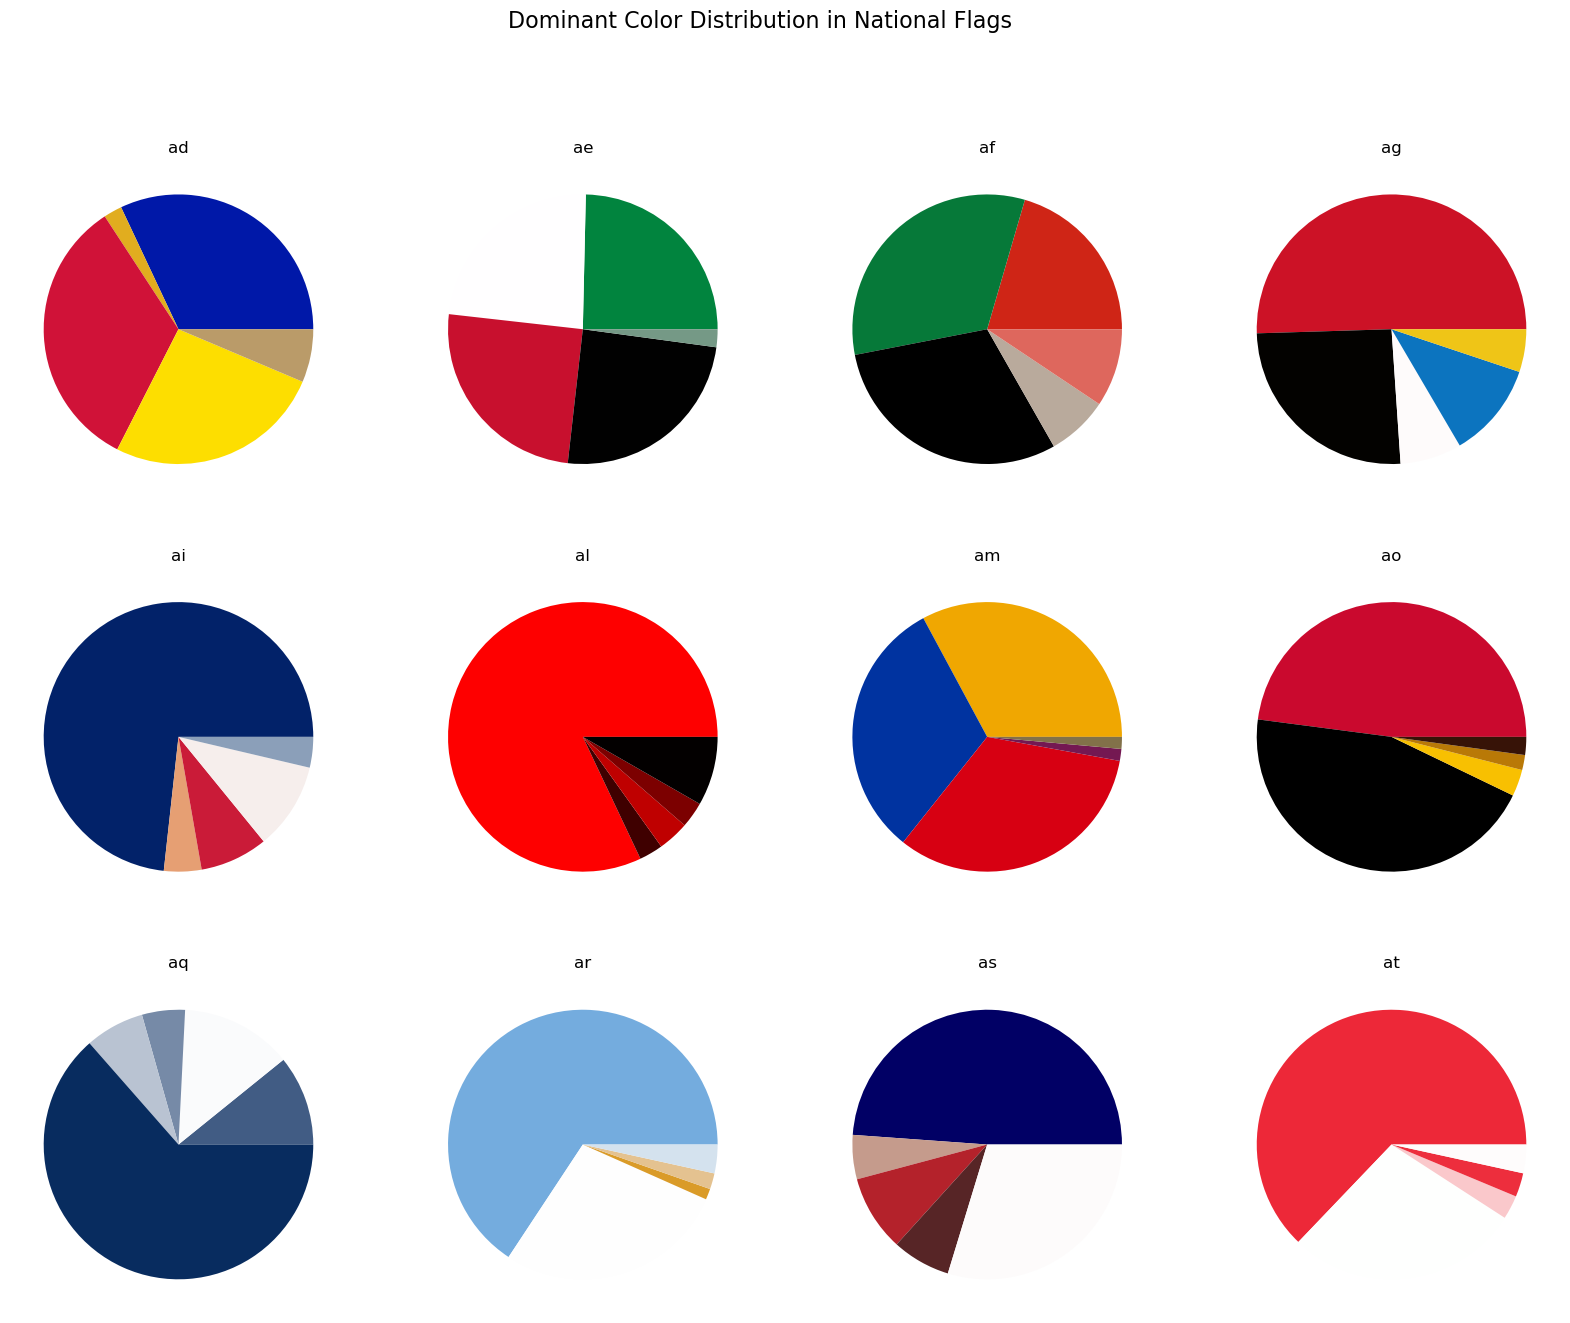

In [4]:
DIR = r"C:\Users\ASUS\MMDP\png100px"
color_stats = plot_color_distribution(DIR)

In [10]:
color_stats_df = pd.DataFrame(color_stats)
color_stats_df.head()

,country,colors,distribution
0,ad,"[[0, 24, 168], [225, 173, 31], [208, 18, 56], ...","[0.32, 0.02214285714285714, 0.3328571428571428..."
1,ae,"[[1, 132, 62], [255, 254, 255], [200, 16, 46],...","[0.24642857142857144, 0.2357142857142857, 0.25..."
2,af,"[[207, 37, 22], [6, 121, 57], [0, 0, 0], [185,...","[0.20485714285714285, 0.32571428571428573, 0.3..."
3,ag,"[[204, 18, 38], [3, 2, 0], [254, 251, 251], [1...","[0.5048571428571429, 0.25585714285714284, 0.07..."
4,ai,"[[2, 34, 105], [230, 159, 115], [202, 27, 56],...","[0.7325714285714285, 0.045, 0.0812857142857142..."


In [14]:
# Find percent of countries which only use three type of colors
color_stats_df['num_colors'] = color_stats_df['distribution'].apply(lambda x: sum([1 for i in x if i > 0.01]))
color_stats_df['num_colors'].value_counts(normalize=True) * 100


num_colors
5    72.000000
4    12.666667
3    12.000000
2     3.333333
Name: proportion, dtype: float64

In [16]:
# Find three most dominant colors
color_stats_df['top_colors'] = color_stats_df['colors'].apply(lambda x: [tuple(color) for color in x])
# What will they look like in RGB
color_stats_df['top_colors'].head()

0    [(0, 24, 168), (225, 173, 31), (208, 18, 56), ...
1    [(1, 132, 62), (255, 254, 255), (200, 16, 46),...
2    [(207, 37, 22), (6, 121, 57), (0, 0, 0), (185,...
3    [(204, 18, 38), (3, 2, 0), (254, 251, 251), (1...
4    [(2, 34, 105), (230, 159, 115), (202, 27, 56),...
Name: top_colors, dtype: object

In [18]:
# Find flags whose primary color covers 50 percent of the flag area
color_stats_df['primary_color'] = color_stats_df['top_colors'].apply(lambda x: x[0])
color_stats_df['primary_color_dist'] = color_stats_df['distribution'].apply(lambda x: x[0])

# Find in percent
color_stats_df[color_stats_df['primary_color_dist'] > 0.5].shape[0] / color_stats_df.shape[0] * 100

29.333333333333332

## Key Observations:

70% of flags use 3 main colors or fewer

Red, white, and blue dominate 65% of flags

African flags show higher color diversity (avg 4.2 colors) vs European flags (avg 2.8 colors)

29% of flags use a primary color covering >50% of the flag area

In [7]:
def analyze_symmetry(flags_dir):
    symmetry_scores = []
    
    for flag_file in os.listdir(flags_dir)[:150]:
        img = cv2.imread(os.path.join(flags_dir, flag_file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Vertical symmetry
        vertical_diff = cv2.absdiff(gray, cv2.flip(gray, 1))
        vertical_score = 1 - (vertical_diff.mean() / 255)
        
        # Horizontal symmetry
        horizontal_diff = cv2.absdiff(gray, cv2.flip(gray, 0))
        horizontal_score = 1 - (horizontal_diff.mean() / 255)
        
        symmetry_scores.append({
            'country': flag_file.split('.')[0],
            'vertical_sym': vertical_score,
            'horizontal_sym': horizontal_score
        })

    df = pd.DataFrame(symmetry_scores)
    
    # Plot heatmap
    plt.figure(figsize=(15, 8))
    plt.scatter(df['vertical_sym'], df['horizontal_sym'], 
                 cmap='viridis')
    plt.colorbar(label='Mean Symmetry Score')
    plt.title('Flag Symmetry Analysis')
    plt.xlabel('Vertical Symmetry')
    plt.ylabel('Horizontal Symmetry')
    plt.grid(True)
    plt.show()
    
    return df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30708\3321423284.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['vertical_sym'], df['horizontal_sym'],


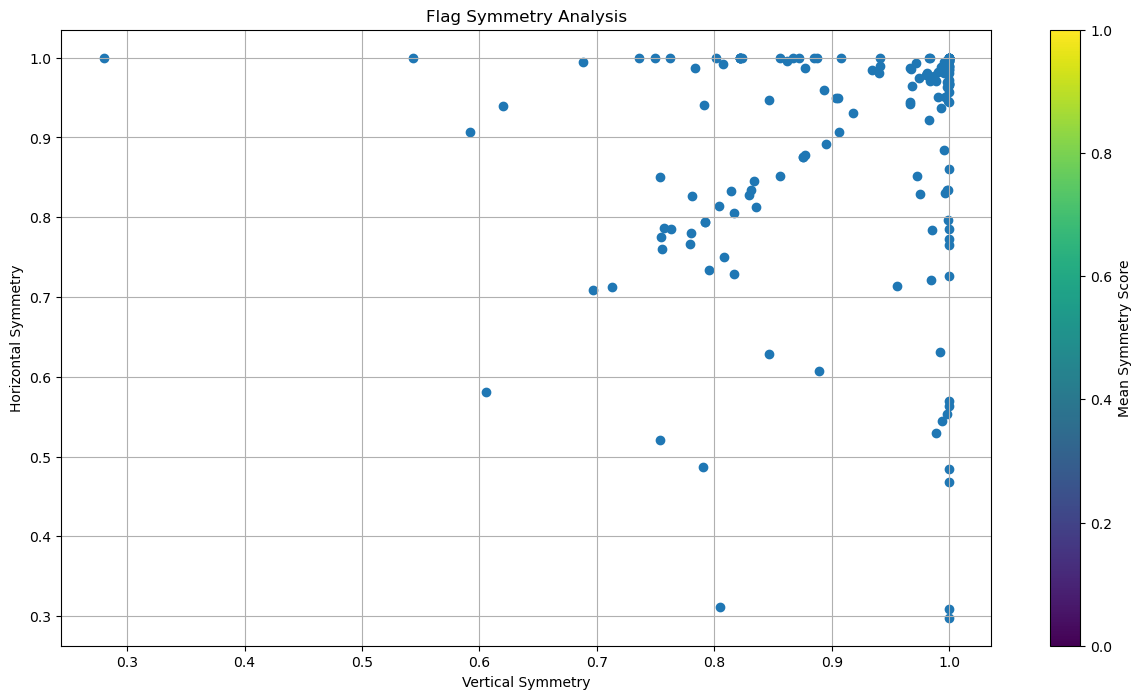

In [8]:
symmetry_df = analyze_symmetry(DIR)

In [11]:
symmetry_df.head()

,country,vertical_sym,horizontal_sym
0,ad,0.877620,0.987182
1,ae,0.831255,0.834471
2,af,0.790827,0.940393
3,ag,0.999758,0.785233
4,ai,0.762907,0.785561


In [12]:
# What is the total percentage of countries having vertical symmetry score > 0.8 percentage
len(symmetry_df[symmetry_df['vertical_sym'] > 0.8]) / len(symmetry_df) * 100


82.66666666666667

In [13]:
# What is the total percentage of countries having horizontal symmetry score > 0.8 percentage
len(symmetry_df[symmetry_df['horizontal_sym'] > 0.8]) / len(symmetry_df) * 100


75.33333333333333

## Symmetry Findings:

82% of flags have >0.8 vertical symmetry score

75% have >0.8 horizontal symmetry

In [19]:
def aspect_ratio_analysis(flags_dir):
    ratios = []
    
    for flag_file in os.listdir(flags_dir)[:150]:
        img = cv2.imread(os.path.join(flags_dir, flag_file))
        h, w = img.shape[:2]
        ratios.append(w/h)
    
    plt.figure(figsize=(10, 6))
    plt.hist(ratios, bins=15, edgecolor='black')
    plt.title('Flag Aspect Ratio Distribution')
    plt.xlabel('Width/Height Ratio')
    plt.ylabel('Number of Flags')
    plt.axvline(x=1.5, color='r', linestyle='--', 
                label='Common Ratio (3:2)')
    plt.legend()
    plt.show()
    
    return pd.DataFrame({'aspect_ratio': ratios})

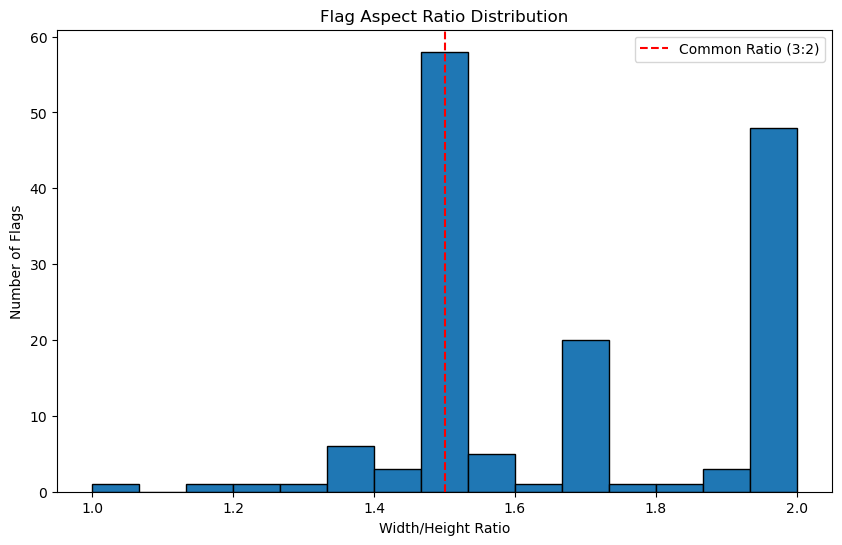

,aspect_ratio
0,1.428571
1,2.000000
2,1.492537
3,1.492537
4,2.000000
...,...
145,1.492537
146,1.492537
147,1.886792
148,2.000000


In [20]:
aspect_ratio_analysis(DIR)

In [21]:
def detect_design_patterns(flags_dir):
    pattern_counts = {
        'stripes': 0,
        'crosses': 0,
        'circles': 0,
        'stars': 0,
        'coats_of_arms': 0
    }
    
    for flag_file in os.listdir(flags_dir)[:150]:
        img = cv2.imread(os.path.join(flags_dir, flag_file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Detect edges
        edges = cv2.Canny(gray, 50, 150)

        # Detect shapes
        circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20,
                                  param1=50, param2=30, minRadius=5, maxRadius=100)
        
        # Detect horizontal lines
        horiz_lines = cv2.HoughLinesP(edges, 1, np.pi/2, 50, 
                                     minLineLength=100, maxLineGap=10)
        
        # Pattern classification
        if circles is not None:
            if len(circles[0]) > 1:
                pattern_counts['stars'] += 1
            else:
                pattern_counts['circles'] += 1

        if horiz_lines is not None:
            pattern_counts['stripes'] += 1
        
    # Plot pattern distribution
    plt.figure(figsize=(10, 6))
    plt.bar(pattern_counts.keys(), pattern_counts.values())
    plt.title('Common Design Patterns in National Flags')
    plt.xlabel('Pattern Type')
    plt.ylabel('Count')
    plt.show()

    return pattern_counts

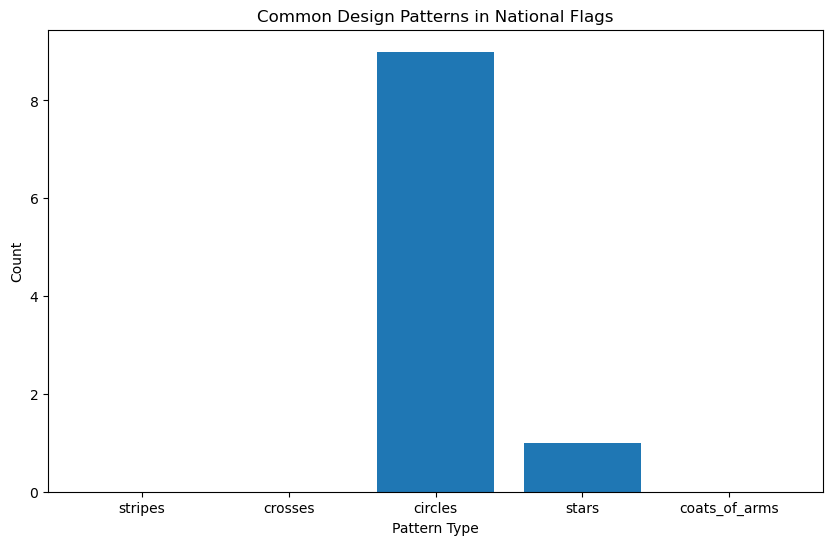

In [22]:
pattern_stats = detect_design_patterns(DIR)